In [3]:
import requests
from urllib.request import urlopen
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())
from bs4 import BeautifulSoup as bs
import time
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from selenium.webdriver.common.by import By

In [4]:
reviewall = pd.read_csv('ReviewCount.csv')

In [21]:
reviewall

,Date
0,2022-09-28
1,2022-09-28
2,2022-09-28
3,2022-09-28
4,2022-09-28
...,...
12703,2021-10-25
12704,2021-10-24
12705,2021-10-18
12706,2021-10-16


In [25]:
from datetime import datetime
reviewall['Date'] = pd.to_datetime(reviewall['Date'])
reviewall['year'] = reviewall['Date'].dt.year
reviewall['month'] = reviewall['Date'].dt.month
reviewall = reviewall[(reviewall['year'] == 2022)]
reviewall = reviewall[reviewall['month'] !=9]
reviewall = pd.concat([reviewall],ignore_index = True)
reviewall

C:\Users\user\AppData\Local\Temp\ipykernel_12248\3956557245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewall['Date'] = pd.to_datetime(reviewall['Date'])
C:\Users\user\AppData\Local\Temp\ipykernel_12248\3956557245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewall['year'] = reviewall['Date'].dt.year
C:\Users\user\AppData\Local\Temp\ipykernel_12248\3956557245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,Date,year,month
0,2022-08-31,2022,8
1,2022-08-31,2022,8
2,2022-08-31,2022,8
3,2022-08-31,2022,8
4,2022-08-31,2022,8
...,...,...,...
7097,2022-01-05,2022,1
7098,2022-01-03,2022,1
7099,2022-01-02,2022,1
7100,2022-01-01,2022,1


In [26]:
df = pd.DataFrame(reviewall.value_counts())
df = df.sort_index(ascending = True)
df.columns = ['개수']
df


,,,개수
Date,year,month,
2022-01-01,2022,1,29
2022-01-02,2022,1,23
2022-01-03,2022,1,19
2022-01-04,2022,1,39
2022-01-05,2022,1,29
...,...,...,...
2022-08-27,2022,8,27
2022-08-28,2022,8,29
2022-08-29,2022,8,26


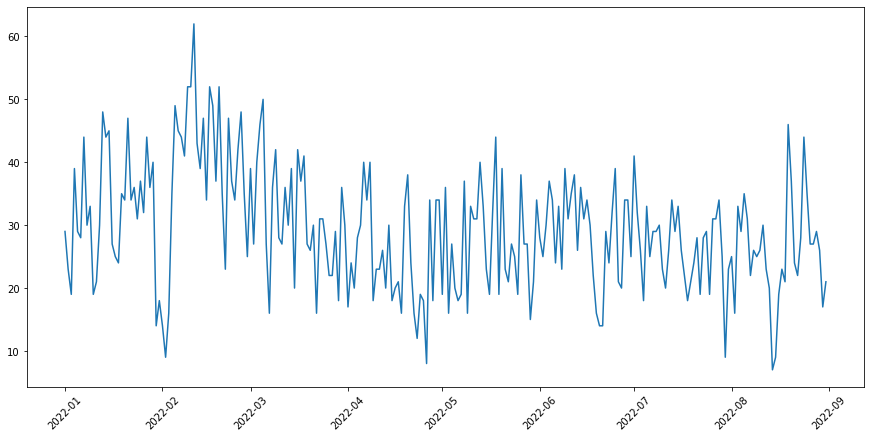

In [27]:
import matplotlib.pyplot as plt
x = df.index.get_level_values(0)
y = df.values
plt.figure(figsize = (15,7))
plt.plot(x,y)
plt.xticks(rotation=45)
plt.show()